# Sales Analysis, Forecasting and Demand Planning Project  

## Project Overview  
This project focuses on developing a robust sales forecasting and demand planning system for retail businesses. By analyzing historical sales data, we aim to optimize production, inventory management, and resource planning by accurately predicting future sales trends. Leveraging machine learning and statistical models, this project provides actionable insights to improve operational efficiency, reduce costs, and enhance customer satisfaction.

---

## About the Dataset  

This dataset provides historical sales data for the retail furniture sector, serving as a valuable resource for business analysis. It includes detailed transaction-level information that can be used to understand sales trends, forecast future demand, and optimize inventory. The dataset enables informed decision-making to ensure business stability and growth in the competitive retail environment.

## Data Source

This sales data is available on Kaggle in the following Link,

> https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

### Dataset Features  

| Feature          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| `Row ID`         | Sequential identifier for each row.                                                 |
| `Order ID`       | Unique identifier for each sales order.                                             |
| `Order Date`     | Date of the sales order.                                                            |
| `Ship Date`      | Date of shipment for the order.                                                     |
| `Ship Mode`      | Mode of shipment for the order.                                                     |
| `Customer ID`    | Unique identifier for each customer.                                                |
| `Customer Name`  | Name of the customer.                                                               |
| `Segment`        | Segment classification of the customer.                                             |
| `Country`        | Country where the sale occurred.                                                    |
| `City`           | City where the sale occurred.                                                       |
| `State`          | State where the sale occurred.                                                      |
| `Postal Code`    | Postal code where the sale occurred.                                                |
| `Region`         | Geographical region where the sale occurred.                                        |
| `Product ID`     | Unique identifier for each product.                                                 |
| `Category`       | Category classification of the product.                                             |
| `Sub-Category`   | Sub-category classification of the product.                                         |
| `Product Name`   | Name of the product.                                                                |
| `Sales`          | Total sales amount for the order.                                                   |
| `Quantity`       | Quantity of products sold in the order.                                             |
| `Discount`       | Discount applied to the order.                                                      |
| `Profit`         | Profit generated from the order.                                                    |

---

## Business Objectives  

1. **Sales Forecasting:**  
   - Predict sales for the next 30 days for each product category.  
   - Identify and leverage trends and seasonality in sales patterns.  

2. **Demand Planning:**  
   - Determine products or categories likely to experience surges in demand.  
   - Reduce overstocking and understocking through accurate forecasts.  

3. **Optimization:**  
   - Optimize production schedules and inventory management.  
   - Identify periods requiring special promotions to counter seasonal declines.  

---

## Methodology  

### 1. **Data Understanding**  
   - **Data Collection:** Gather historical sales data, pricing, promotions, holidays, and external factors (e.g., weather).  
   - **Exploratory Data Analysis (EDA):** Perform statistical analysis and create visualizations to uncover trends, seasonality, and anomalies.  
   - **Data Quality Assessment:** Identify and address missing, inconsistent, or irrelevant data.  

### 2. **Data Preparation**  
   - **Data Cleaning:** Handle missing values, outliers, and duplicates. Normalize sales data if necessary.  
   - **Feature Engineering:** Create lag variables, rolling averages, seasonal indices, and encode categorical variables for modeling.  
   - **Data Splitting:** Split the dataset into training, validation, and testing sets.  

### 3. **Modeling**  
   - **Baseline Models:** Develop simple models such as moving averages or exponential smoothing for benchmarking.  
   - **Advanced Models:** Train machine learning (e.g., ARIMA, SARIMA, XGBoost, Random Forest) and deep learning models (e.g., LSTM, GRU, Prophet).  
   - **Hyperparameter Optimization:** Fine-tune models to enhance accuracy and efficiency.  

### 4. **Evaluation**  
   - **Evaluation Metrics:** Use RMSE, MAPE, MAE, and R² to assess model performance.  
   - **Visualization:** Plot predicted vs. actual sales to analyze trends and deviations.  
   - **Model Selection:** Choose the best-performing model for deployment.  

---

## Applications  

- **Inventory Management:** Ensure optimal inventory levels, minimizing costs associated with overstocking or stockouts.  
- **Production Planning:** Use forecasts to adjust production schedules based on predicted demand.  
- **Promotional Campaigns:** Identify low-demand periods and design targeted promotions to boost sales.  
- **Revenue Forecasting:** Provide accurate revenue projections to guide financial planning.  

---

## Research Questions  

1. What are the expected sales for the next 30 days for each product category?  
2. Which products or categories show clear trends or seasonal demand patterns?  
3. How can accurate demand forecasts improve inventory management and reduce operational costs?  
4. Which time periods require targeted promotional strategies to mitigate sales dips?  

---

## Results and Insights  

1. **Seasonal Trends:** Sales demonstrate clear peaks during holiday seasons and dips during specific months.  
2. **Top-Selling Products:** Analysis of product categories reveals best-performing items and their contribution to revenue.  
3. **Demand Surges:** Certain products experience predictable spikes in demand, enabling proactive inventory management.  
4. **Model Performance:** LSTM and SARIMA models outperformed baseline methods in forecasting accuracy.  

---

## Conclusion  

This project equips retail businesses with powerful forecasting tools to make data-driven decisions. By understanding historical sales patterns, businesses can optimize inventory, enhance production efficiency, and maximize profitability while maintaining customer satisfaction.


### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
model_path = "../models"
csv_path = os.path.join(data_path, "ssf_monthly.csv")
# csv_path = os.path.join(data_path, "ssf_cleaned.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

In [18]:
# Show 1st 5 rows
df.head()

,ds,y
0,2014-01-31,8639.6335
1,2014-02-28,12639.3790
2,2014-03-31,25293.3705
3,2014-04-30,17205.0717
4,2014-05-31,12942.5008


### Preprocessing

In [5]:
# Rename feature for prophet
df.columns = ["ds", "y"]

# Sanity check
df.head()

,ds,y
0,2014-01-31,8639.6335
1,2014-02-28,12639.3790
2,2014-03-31,25293.3705
3,2014-04-30,17205.0717
4,2014-05-31,12942.5008


In [6]:
# Convert ds as object to datetime
df["ds"] = pd.to_datetime(df["ds"], errors= "coerce")

In [7]:
# Normalize the data
# scaler = MinMaxScaler()
# df["Sales_Scaled"] = scaler.fit_transform(df["Sales"].values.reshape(-1, 1))

In [8]:
# Log Transformation
# df["Sales_log"] = np.log(df["Sales"] + 1)

### Model Training

In [19]:
# Train the model
def train_model(data, seasonality_mode= "additive", seasonality_type= None):
    model = Prophet(seasonality_mode= seasonality_mode)
    # Add extra seasonality if required
    if seasonality_type == "monthly":
        model.add_seasonality(name= "monthly", period= 30.5, fourier_order= 5)
    elif seasonality_type == "quarterly":
        model.add_seasonality(name= "quarterly", period= 91.25, fourier_order= 5)
    # Train the model
    model.fit(data)
    
    return model


In [29]:
# Sales forecasting
def sales_forecast(model, data, period= 30):
    # Make future dataframe
    future = model.make_future_dataframe(periods= period, freq= 'M')

    # Make future prediction
    forecast = model.predict(future)

    # Merge forecast with data on ds
    data_f = data.merge(forecast, on="ds")

    return forecast, data_f

In [11]:
# Print Evaluation Metrics
def evaluate(y, y_pred, verbose= True):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) * 100
    if verbose:
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"MAPE: {mape: 0.2f}")
    return mae, mse, np.sqrt(mse), mape

In [12]:
# Plot the forecast and its components
def plot_forecast(model, forecast):
    # Plot Forecast
    model.plot(forecast)
    # Plot forecast components(Trend, Seasonality)
    model.plot_components(forecast)
    plt.show()

In [40]:
# Train the model
model = train_model(df)

08:30:58 - cmdstanpy - INFO - Chain [1] start processing
08:30:59 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
# Forecast sales
forecast, df_forecast = sales_forecast(model, df)

In [42]:
# Evaluate Model
evaluate(df_forecast["y"], df_forecast["yhat"])

MAE: 3098.5047222239286
MSE: 16641144.089314843
RMSE: 4079.3558424480257
MAPE:  15.67


(3098.5047222239286,
 16641144.089314843,
 4079.3558424480257,
 15.669304682707452)

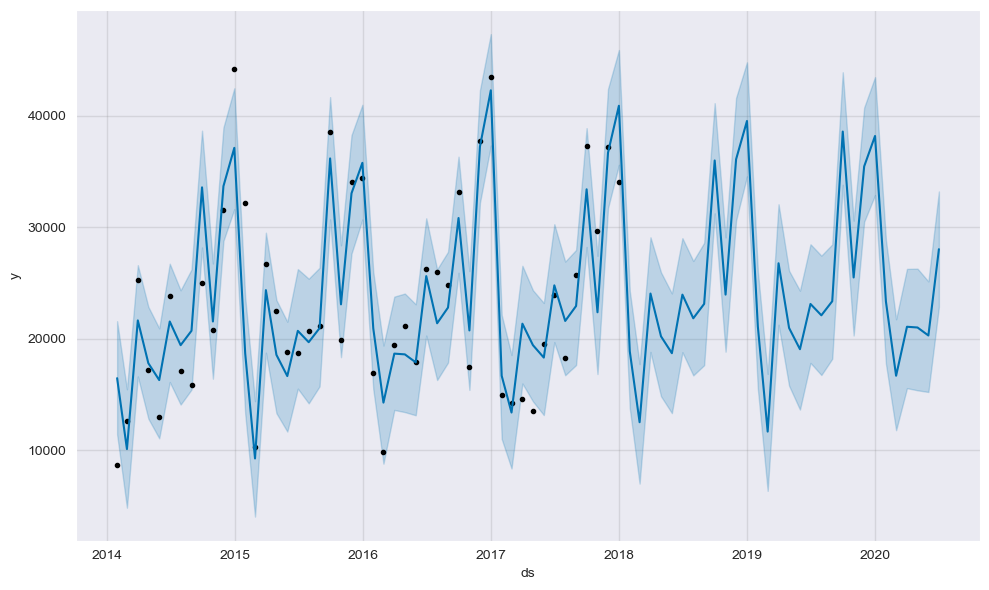

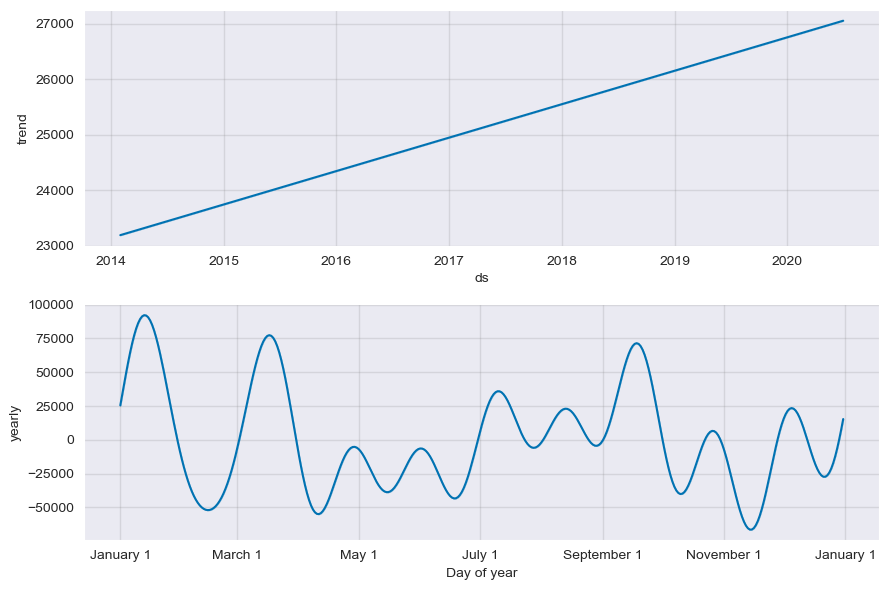

In [43]:
# Plot the forecast
plot_forecast(model, forecast)

### Insights

#### Model Performance Metrics

- **MAE (3098.50):** This indicates a much smaller average error compared to SARIMAX and LSTM models, which previously had MAE values of ~6665 and ~757 respectively (scaled). The reduction in error suggests a better fit to the data.
- **RMSE (4079.36):** This value, representing the standard deviation of residuals, is also much lower compared to previous models, indicating a better ability to capture data variability.
- **MAPE (15.67%):** The Mean Absolute Percentage Error is significantly improved and below 20%, which is often considered acceptable for most business forecasting tasks.

**Comment:** The Prophet model provides a clear improvement, especially in terms of MAPE, making it better suited for this dataset.

#### Visual Evaluation

- **Forecast Plot:**

    - The model captures the seasonality and general trends in the data well, with reasonable uncertainty intervals (blue shaded regions).
    - The sharp spike at the end of 2017 appears to be accounted for, though Prophet might have some challenges with extreme values.

- **Trend Plot:**

    - The long-term trend indicates a consistent increase, which aligns well with the observed data.
- **Yearly Seasonality Plot:**

    - Prophet successfully identifies recurring seasonal patterns, with peaks and troughs aligned to the data. This is essential for capturing cyclical behavior in sales.

#### Areas for Improvement

- **Extreme Spikes:** While Prophet has captured the sharp increase at the end of the dataset, it may overestimate or underestimate similar spikes in future forecasts. If such spikes are critical, additional features (e.g., special events) should be added to the model.
- **Uncertainty Intervals:** The uncertainty bounds seem wide toward the end of the forecast. This reflects model confidence, but the bounds might indicate underlying variability or noise in the data.

#### Recommendations

- Adjust Prophet's parameters (e.g., seasonality mode: "multiplicative" vs. "additive") to improve fit for highly variable data.
- Perform rolling cross-validation with Prophet to confirm the robustness of the forecast and avoid overfitting.

### Model Optimization

#### Adjust Prophet's Parameters (Seasonality Mode)

In [44]:
# Train the model
opt_model = train_model(df, seasonality_mode="multiplicative", seasonality_type="quarterly")

08:31:39 - cmdstanpy - INFO - Chain [1] start processing
08:31:41 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# Forecast sales
forecast, df_forecast = sales_forecast(opt_model, df, 12)

In [46]:
# Evaluate Model
evaluate(df_forecast["y"], df_forecast["yhat"])

MAE: 2628.414864236433
MSE: 12965074.359726036
RMSE: 3600.7047032110304
MAPE:  13.08


(2628.414864236433, 12965074.359726036, 3600.7047032110304, 13.077885484486165)

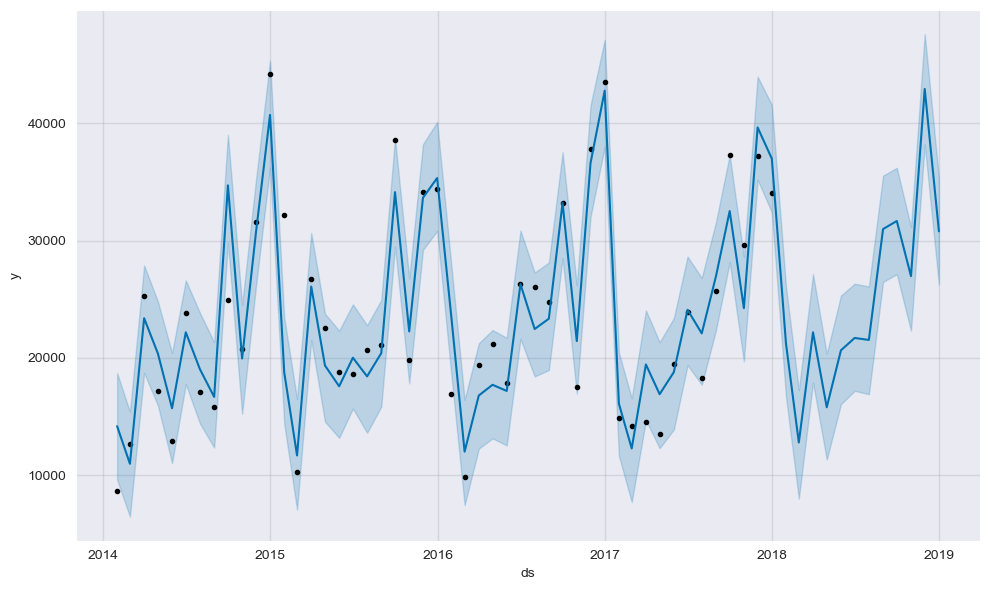

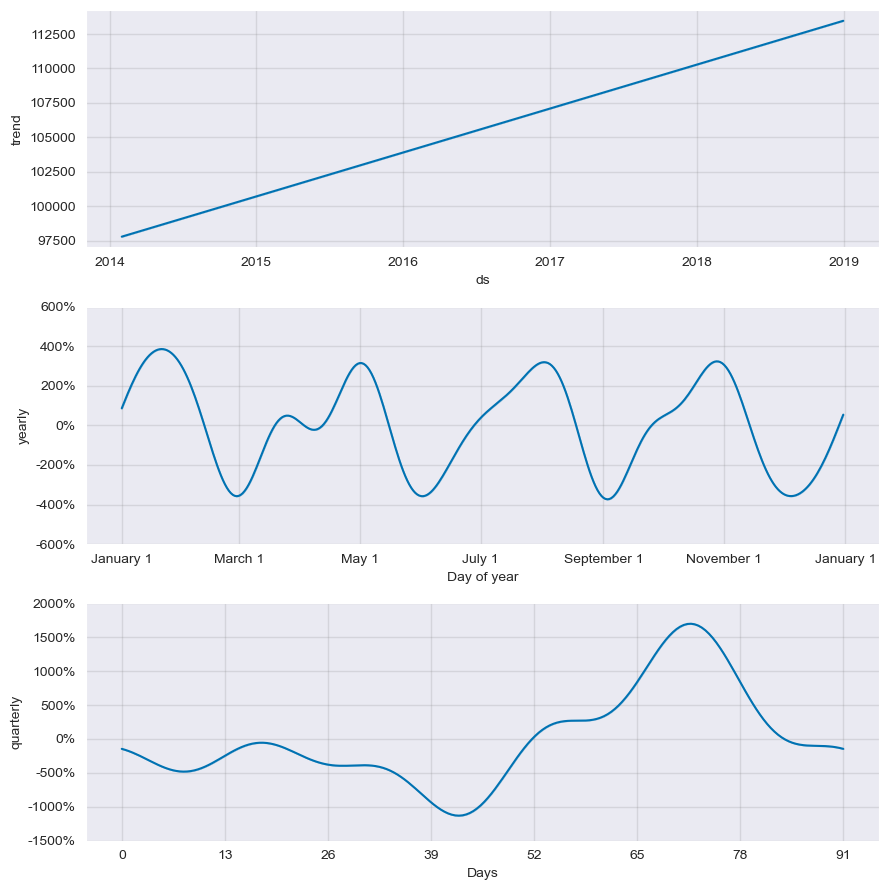

In [47]:
# Plot the forecast
plot_forecast(opt_model, forecast)

#### Perform Rolling Cross-Validation

In [48]:
# Perform cross-validation
df_cv = cross_validation(
    model= opt_model,  # Fitted Prophet model
    initial='730 days',  # Training window (e.g., 2 years)
    period='180 days',   # Period between cutoff points (e.g., 6 months)
    horizon='365 days'   # Forecast horizon (e.g., 1 year)
)

# Evaluate the model performance
df_p = performance_metrics(df_cv)
print(df_p)

  0%|          | 0/2 [00:00<?, ?it/s]

08:32:18 - cmdstanpy - INFO - Chain [1] start processing
08:32:20 - cmdstanpy - INFO - Chain [1] done processing
08:32:20 - cmdstanpy - INFO - Chain [1] start processing
08:32:20 - cmdstanpy - INFO - Chain [1] done processing


    horizon           mse          rmse           mae      mape     mdape  \
0   31 days  1.490400e+08  12208.192387  11756.222095  0.573180  0.573180   
1   58 days  9.202865e+07   9593.156266   9533.482911  0.497941  0.497941   
2   59 days  7.276640e+07   8530.322466   8179.025072  0.416173  0.416173   
3   88 days  2.751706e+08  16588.268104  14249.207663  0.544744  0.544744   
4   90 days  2.859466e+08  16909.955851  15068.596207  0.596101  0.596101   
5  119 days  3.555999e+08  18857.357099  16508.764179  0.986246  0.986246   
6  120 days  4.067569e+08  20168.215836  19076.246401  1.196291  1.196291   
7  149 days  1.089601e+08  10438.396217  10167.551347  0.566962  0.566962   
8  151 days  3.060197e+07   5531.904373   4168.937804  0.116916  0.116916   
9  180 days  1.140891e+09  33777.078881  24148.886854  0.562752  0.562752   
10 181 days  1.141059e+09  33779.567003  24276.213903  0.565567  0.565567   
11 211 days  1.782327e+09  42217.612327  30243.461572  2.019768  2.019768   

### Insights

#### Metrics Analysis

- **Mean Absolute Error (MAE):**

    - Reduced to **2628.41** from the previous **3098.50**, showing better accuracy.
    - Indicates a lower average error between actual and predicted values.
- **Mean Squared Error (MSE):**

    - Dropped significantly to **12,965,074.36** from **16,641,144.09**.
    - Reflects a reduction in variance of forecast errors, suggesting the model is fitting the data more accurately.

- **Root Mean Squared Error (RMSE):**

    - Improved to **3600.70** from **4079.36**.
    - RMSE is closer to the actual scale of the target variable, making it a more interpretable improvement.
- **Mean Absolute Percentage Error (MAPE):**

    - Improved to **13.08%** from **15.67%**.
    - A MAPE below **15%** indicates that the model is performing quite well in forecasting relative to the scale of the data.

#### Visual Evaluation

- **Forecast vs. Actuals:**

    - The model tracks the trend and seasonality of the actual data well.
    - The uncertainty intervals (shaded regions) are narrower, indicating greater confidence in the predictions.
    - Seasonal spikes and dips align more closely with the observed data, especially around quarters with significant sales variations.
- **Trend Plot:**

    - The upward trend is accurately captured, reflecting the long-term increase in sales over the years.
- **Yearly Seasonal Component:**

    - Multiplicative seasonality accounts for the proportional changes in the data, as seen in the amplified seasonal patterns.
- **Quarterly Component:**

    - The quarterly periodicity reflects spikes and dips accurately, suggesting the addition of quarterly seasonality has captured these effects effectively.

In [49]:
# Save the model
prophet_path = os.path.join(model_path, "sf_prophet.pkl")
with open(prophet_path, "wb") as prophet_model:
    pickle.dump(opt_model, prophet_model)